# Optical Fibres

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import interpolate as inter

In [2]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [3]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.


## Structure of an optical fibre  
  
A standard optical fibre consists of a cladding and a core. The core and cladding are configured coaxially, with the core at the center of the fibre. The core's refractive index, $n_{co}$, is greater than that of the cladding, $n_{cl}$, so that light can be guided via total internal reflection.

In [11]:
%%html
<center><img src="../img/optical_fibre.gif" width="20%"></center>

**Refractive index profile**  
Refractive index profiles of optical fibres can be very complex and some of the many types are discussed here [Index Profiles](./docs/RIndex.pdf). In this module we will focus of step index fibres, i.e. fibres that have a cladding and a core with a flat profile. 

In [12]:
%%html
<center><img src="../img/indexprofile.jpg" width="30%"></center>

**Acceptance angle**  
As the guiding mechanism is total internal reflection, the light must enter the fibre at or less than an acceptance angle, $\alpha_{max}$ given by:  
  
$$ \sin\alpha_{max} = \frac{1}{n_{air}}\sqrt{n_{co}^{2}-n_{cl}^{2}}$$

In [13]:
%%html
<center><img src="../img/accang.jpg" width="50%"></center>

**Numerical aperture**  
In the field of optical fibres, the numerical aperture ($NA$) is often used as a dimensionless parameter to quantify the acceptance angle.
  
$$NA = \sqrt{n_{co}^2-n_{cl}^2}$$

## Modes  
Depending on the refractive index and wavelength of light an optical fibre can guide just a discrete number of modes. The normalized frequency is a dimensionless parameter and hence is also sometimes simply called the $V$-number or value of the fiber. It combines in a very useful manner the information about three important design variables for the fiber: namely, the core radius $a$, the relative refractive index difference $\Delta$ and the operating wavelength $\lambda$.  
  
$$V = \frac{2\pi}{\lambda}NA$$  
  
The number of modes that can be supported by an optical fibre can easily be approximated by:  
  
$$M_{n} \simeq \frac{V^{2}}{2}$$
  
For $V<2.405$ the fibre can only support one mode and is said to be single-mode.

In [7]:
def hussey(V):
    peterman = 0.65 + 1.619*(V**(-3/2)) + 2.879*(V**(-6))-(0.016+1.561*(V**(-7)))
    print("V-Number = ",V)
    x = np.arange(-8,8,0.01)
    y = np.e**((-4*np.log(2)*(x**2))/((2.4*peterman)**2))
    plt.plot(x,y)
    plt.xlabel(r'$\mu\mathrm{m}$')
    plt.ylabel(r'Normalised power')
    plt.show()
    
def hussey3D(V):
    peterman = 0.65 + 1.619*(V**(-3/2)) + 2.879*(V**(-6))-(0.016+1.561*(V**(-7)))
    x = np.arange(-20,20,0.01)
    y = np.e**((-4*np.log(2)*(x**2))/((2.4*peterman)**2))
    plt.plot(x,y)
    plt.show()

In [8]:
def Vnumber(a, lam):
    V = ((2*a*np.pi)/lam)*0.13
    hussey(V)

**Interactive:** Using the interactive graph, have a play and see how changing the core radius $a$ and wavelength $\lambda$ change the V-number and the mode diameter.

V-Number =  2.1237166338267004


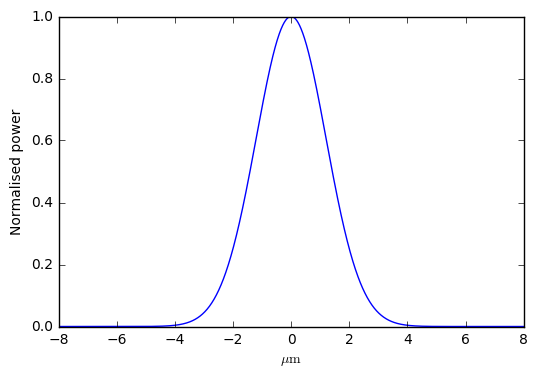

In [9]:
interact(Vnumber, a =(2,7,0.1), lam = (1.3,1.8,0.1));

**This is a 3D representation, play with the code if you like**

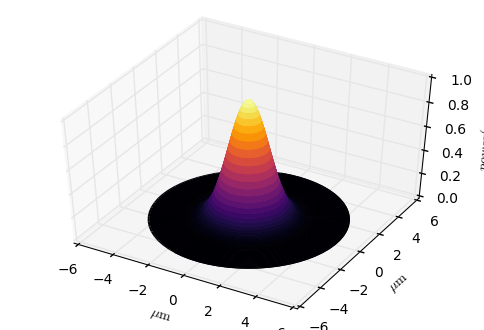

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import interpolate as inter

sig = 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r, p = np.mgrid[-5:5:0.1, -5:5:0.1]

# Express the mesh in the cartesian system.
X, Y = r*np.cos(p), r*np.sin(p)
Z = np.exp( - ((X**2)/(2*(sig**2)) + (Y**2)/(2*(sig**2))))

# Plot the surface.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno, linewidth=0)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\mu\mathrm{m}$')
ax.set_ylabel(r'$\mu\mathrm{m}$')
ax.set_zlabel(r'$power(norm)$')
ax.view_init(elev=45)
plt.show()
